<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [22]:
# !wget --no-check-certificate https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [23]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


## Demo: How to run an sql query


In [25]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [26]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [27]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [28]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


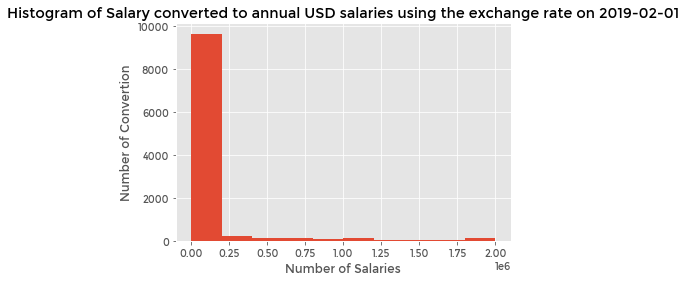

In [29]:
# your code goes here

QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df["ConvertedComp"].plot.hist()
plt.title('Histogram of Salary converted to annual USD salaries using the exchange rate on 2019-02-01')
plt.ylabel('Number of Convertion')
plt.xlabel('Number of Salaries')

plt.show()

### Box Plots


Plot a box plot of `Age.`


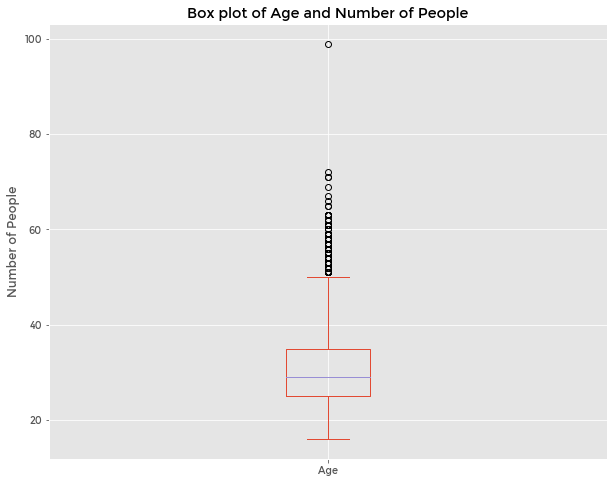

In [30]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df["Age"].plot(kind='box', figsize=(10, 8))

plt.title('Box plot of Age and Number of People')
plt.ylabel('Number of People')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


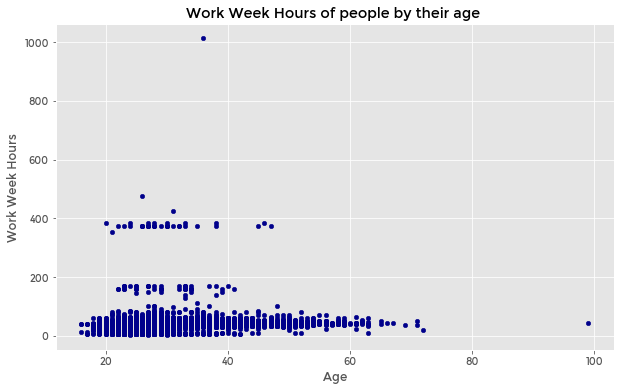

In [31]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('Work Week Hours of people by their age ')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


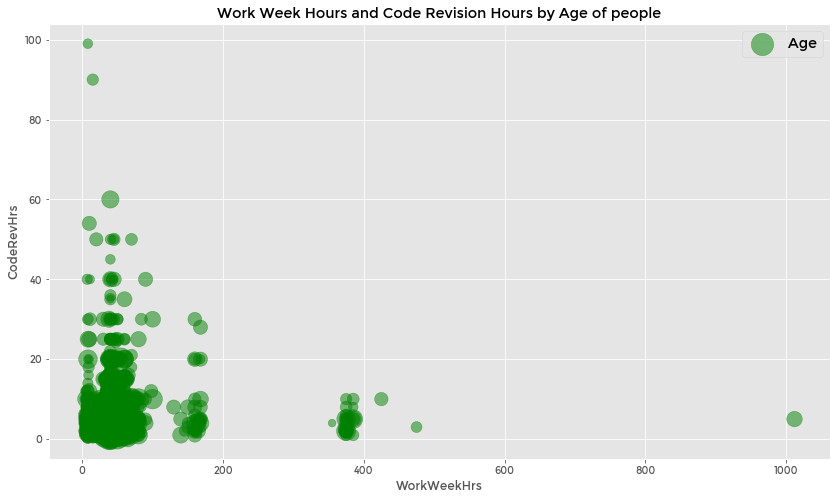

In [32]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

ax = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    figsize=(14, 8),
                    alpha=0.5,      # transparency
                    color='green',
                    s=norm_age *1000 # pass in weights 
        
                   )

ax.set_ylabel('CodeRevHrs')
ax.set_title('Work Week Hours and Code Revision Hours by Age of people')
ax.legend(['Age'], loc='upper right', fontsize='x-large')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


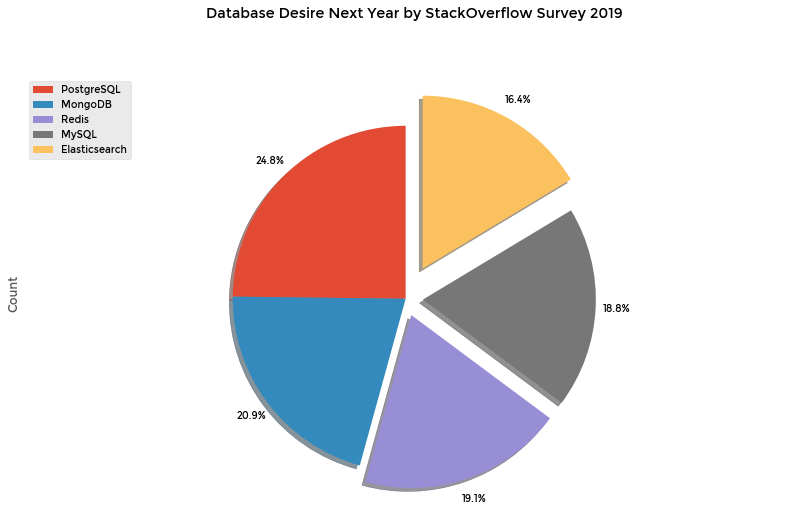

In [33]:
# your code goes here

QUERY = """
SELECT count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear
FROM DatabaseDesireNextYear
Group BY DatabaseDesireNextYear
ORDER BY Count desc
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
explode_list = [ 0, 0, 0.1, 0.1, 0.2] # ratio for each database with which to offset each wedge.

df["Count"].plot(kind='pie',
                            figsize=(14,8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 databases
                            )
# scale the title up by 12% to match pctdistance
plt.title('Database Desire Next Year by StackOverflow Survey 2019', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df["DatabaseDesireNextYear"], loc='upper left')


In [34]:
QUERY="""
SELECT DatabaseWorkedWith,count(Respondent)
FROM DatabaseWorkedWith
group by Respondent having count(DatabaseWorkedWith)=1 and DatabaseWorkedWith='MySQL'"""
df2=pd.read_sql_query(QUERY,conn)
df2.count()

DatabaseWorkedWith    474
count(Respondent)     474
dtype: int64

In [35]:
QUERY = """
SELECT count(LanguageWorkedWith) as Count,LanguageWorkedWith
FROM LanguageWorkedWith
Group BY LanguageWorkedWith
ORDER BY Count desc
LIMIT 30
"""
df = pd.read_sql_query(QUERY,conn)
df.head(30)

,Count,LanguageWorkedWith
0,8687,JavaScript
1,7830,HTML/CSS
2,7106,SQL
3,4642,Bash/Shell/PowerShell
4,4542,Python
5,4506,Java
6,4288,C#
7,3232,TypeScript
8,2913,PHP
9,1946,C++


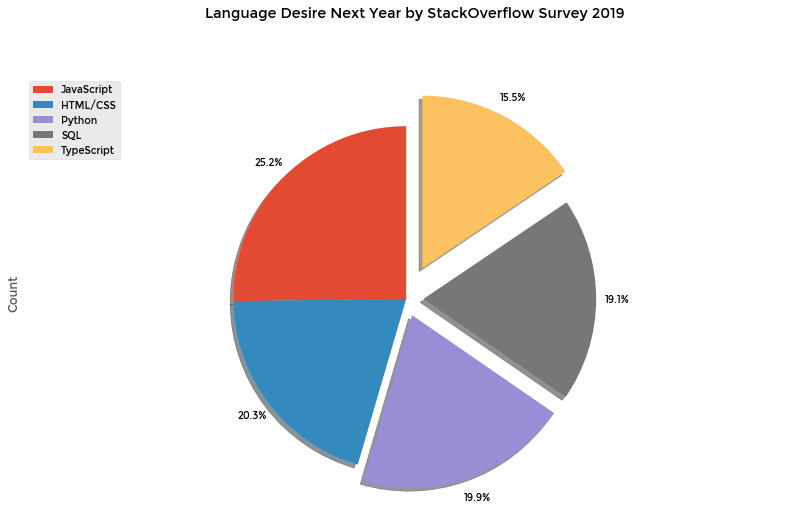

In [36]:
# your code goes here

QUERY = """
SELECT count(LanguageDesireNextYear) as Count,LanguageDesireNextYear
FROM LanguageDesireNextYear
Group BY LanguageDesireNextYear
ORDER BY Count desc
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
explode_list = [ 0, 0, 0.1, 0.1, 0.2] # ratio for each database with which to offset each wedge.

df["Count"].plot(kind='pie',
                            figsize=(14, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 databases
                            )
# scale the title up by 12% to match pctdistance
plt.title('Language Desire Next Year by StackOverflow Survey 2019', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df["LanguageDesireNextYear"], loc='upper left') 


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5, 1.0, 'Median Work Week Hours and Code Revision hours in 30-35 age group')

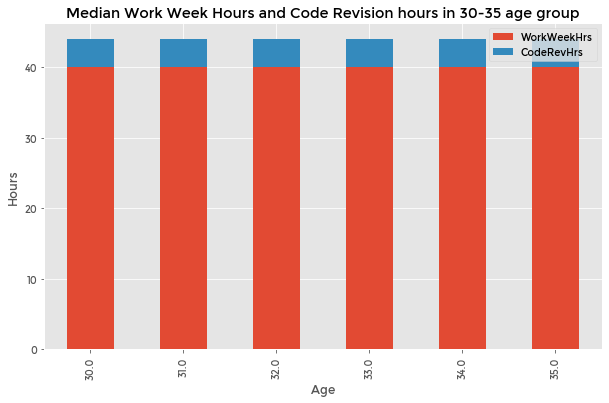

In [37]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM Master
Where Age between 30 and 35

"""
df = pd.read_sql_query(QUERY,conn)
df = df.groupby("Age").median()
df.plot(kind='bar', stacked=True, figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Median Work Week Hours and Code Revision hours in 30-35 age group')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


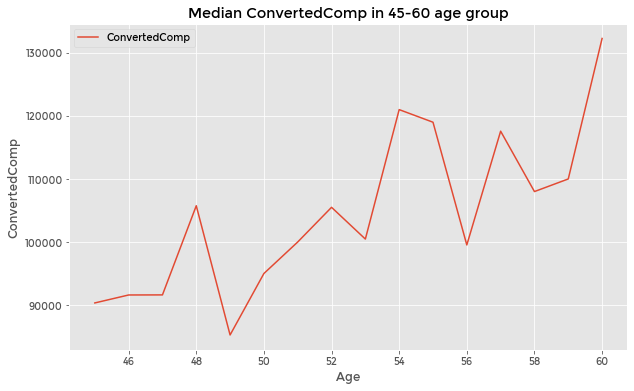

In [38]:
# your code goes here
QUERY = """
SELECT ConvertedComp,Age
FROM Master
Where Age between 45 and 60

"""
df = pd.read_sql_query(QUERY,conn)
df = df.groupby("Age").median()
df.plot(kind='line',figsize=(10, 6))

plt.title('Median ConvertedComp in 45-60 age group')
plt.ylabel('ConvertedComp')
plt.xlabel('Age')

plt.show() # need this line to show the updates made to the figure


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


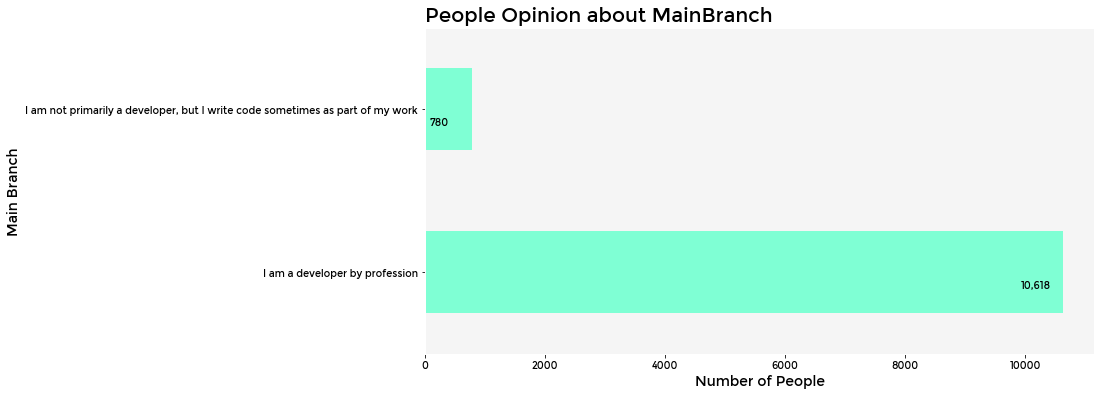

In [44]:
# your code goes here
QUERY = """
SELECT MainBranch,count(MainBranch) as count
FROM Master
Group by MainBranch
"""
df = pd.read_sql_query(QUERY,conn)

df = df.set_index("MainBranch")
df["count"]=df["count"].astype('int')

df.rename(columns={'count':'Total People Opinion'}, inplace=True)

fig, ax = plt.subplots(figsize=(12,6))
# df.rename(columns={'count':'Total People Opinion'}, inplace=True)

df.plot(kind='barh', legend = False, ax=ax, color='aquamarine')
ax.set_xlabel('Number of People',color='black',fontfamily="Montserrat",fontsize=14)
ax.set_ylabel('Main Branch',color='black',fontfamily="Montserrat",fontsize=14)
ax.set_xlabel('Number of People')
ax.set_title('People Opinion about MainBranch',color='black',fontfamily="Montserrat",fontsize=20,loc='left')

ax.set_facecolor('whitesmoke')

ax.tick_params(axis='x', colors='black')    #setting up X-axis tick color to black
ax.tick_params(axis='y', colors='black')    #setting up Y-axis tick color to black

plt.rcParams["font.family"] = "Montserrat"
plt.grid(visible=None)

# annotate value labels to each country
for i in range(len(df)): #enamurate returns tuple
    # print(df["Total People Opinion"][i])
    value = df["Total People Opinion"][i]
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 700 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value-700, i-0.1), color='black')
plt.savefig("mainbranch.png",bbox_inches='tight')
plt.show()

Close the database connection.


In [40]:
# conn.close()

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
